In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts
from datetime import datetime
%matplotlib inline


Наша задача - проанализировать датасет, полученный из базы данных о перелетах на предмет прибыльных и малоприбыльных перелетов (рейсов)

In [3]:
flights = pd.read_csv('query_result.csv')
flights.head()

,flight_id,arrival_airport,model,seats_total,flight_time,day_of_week,flight_id.1,sum_amount,seats_count_sold
0,136119,SVO,Boeing 737-300,130,101.0,2.0,136119,1653000.0,113
1,136120,SVO,Boeing 737-300,130,99.0,5.0,136120,1605400.0,109
2,136122,SVO,Boeing 737-300,130,100.0,0.0,136122,1431000.0,97
3,136130,SVO,Boeing 737-300,130,99.0,1.0,136130,1556600.0,107
4,136131,SVO,Boeing 737-300,130,99.0,6.0,136131,1812800.0,124


Какие данные у нас есть в этой таблице:

flight_id - уникальный идентификатор полета

arrival_airport - код аэропорта прибытия

model - модель самолета

seats_total - количество мест в самолете всего

flight_time - длительность полета в минутах

day_of_week - день недели, когда был осуществлен вылет от 0 до 6, где 0 - воскресенье ... 6 - суббота

flight_id.1 - уникальный идентификатор полета (дублируется столбец, нужно удалить)

sum_amount - сумма, вырученная за полет (доход от продажи билетов)

seats_count_sold - количество проданных билетов

Видим, что некоторые данные дублируются, некоторых данных не хватает.

Удалим, подкорректируем, дополним и посмотрим на данные с помощью методов визуализации.

In [4]:
flights = flights.drop(['flight_id.1'], axis = 1)

In [5]:
flights.head(4)

,flight_id,arrival_airport,model,seats_total,flight_time,day_of_week,sum_amount,seats_count_sold
0,136119,SVO,Boeing 737-300,130,101.0,2.0,1653000.0,113
1,136120,SVO,Boeing 737-300,130,99.0,5.0,1605400.0,109
2,136122,SVO,Boeing 737-300,130,100.0,0.0,1431000.0,97
3,136130,SVO,Boeing 737-300,130,99.0,1.0,1556600.0,107


In [6]:
print(flights.flight_id.nunique()) # количество перелетов всего за период 12.2016 - 02.2017

180


In [7]:
flights.flight_time.describe() # описание времени перелета в минутах

count    180.000000
mean      74.988889
std       25.061709
min       49.000000
25%       50.000000
50%       74.500000
75%      100.000000
max      103.000000
Name: flight_time, dtype: float64

Судя по времени перелета, рейсы осуществляются без пересадок. 

In [8]:
# рейсы осущствлялись только в 2 аэропорта (Москву - SVO и Белгород - EGO) за указанный период
print(flights.arrival_airport.unique())

['SVO' 'EGO']


In [9]:
print(flights[flights.arrival_airport == 'SVO'].model.unique())
print(flights[flights.arrival_airport == 'EGO'].model.unique())

['Boeing 737-300']
['Sukhoi Superjet-100']


Мы видим, что в Москву летает Boeing 737-300, а в Белгород Sukhoi Superjet-100.

Дополнительная информация:

Расстояние полета между Анапой и Москвой 1207 км = 750 миль (https://avia.tutu.ru/reys/n4_182)
Расстояние полета между Анапой и Белгородом 637 км = 396 миль (https://travelask.ru/questions/680447-skolko-letet-iz-anapy-v-belgorod)

Расход топлива 
(http://newsruss.ru) 
Boeing 737-300 (кг на 1 пассажира на 1207 км) = 31,38 кг или 2400 кг в час 
(http://superjet.wikidot.com/wiki:rashod-topliva)
Sukhoi Superjet-100 (кг на 1 пассажира на 637 км) = 17 кг или 1800 кг в час

Стоимость топлива в декабре 2016 - январе 2017: 39 400 рос.руб. без НДС за тонну
https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329

In [10]:
# добавим показатель aircraft_occupancy - заполняемость самолета в рейсе в %
flights['aircraft_occupancy'] = round((flights.seats_count_sold / flights.seats_total)*100,2)
flights.head()

,flight_id,arrival_airport,model,seats_total,flight_time,day_of_week,sum_amount,seats_count_sold,aircraft_occupancy
0,136119,SVO,Boeing 737-300,130,101.0,2.0,1653000.0,113,86.92
1,136120,SVO,Boeing 737-300,130,99.0,5.0,1605400.0,109,83.85
2,136122,SVO,Boeing 737-300,130,100.0,0.0,1431000.0,97,74.62
3,136130,SVO,Boeing 737-300,130,99.0,1.0,1556600.0,107,82.31
4,136131,SVO,Boeing 737-300,130,99.0,6.0,1812800.0,124,95.38


<AxesSubplot:>

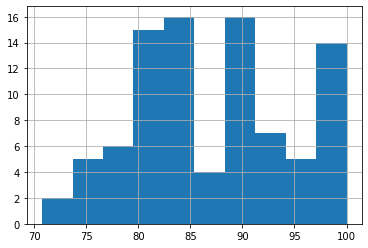

In [11]:
flights[flights.arrival_airport == 'SVO'].aircraft_occupancy.hist()

<AxesSubplot:>

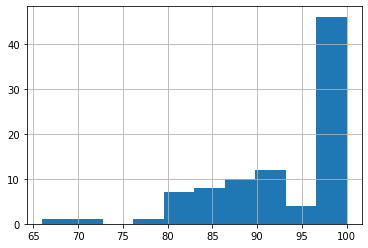

In [12]:
flights[flights.arrival_airport == 'EGO'].aircraft_occupancy.hist()

In [13]:
flights[flights.aircraft_occupancy < 75]

,flight_id,arrival_airport,model,seats_total,flight_time,day_of_week,sum_amount,seats_count_sold,aircraft_occupancy
2,136122,SVO,Boeing 737-300,130,100.0,0.0,1431000.0,97,74.62
30,136253,SVO,Boeing 737-300,130,98.0,6.0,1407800.0,93,71.54
56,136352,SVO,Boeing 737-300,130,100.0,6.0,1372400.0,92,70.77
57,136360,SVO,Boeing 737-300,130,100.0,0.0,1455400.0,97,74.62
69,136418,SVO,Boeing 737-300,130,100.0,3.0,1407800.0,97,74.62
102,136642,EGO,Sukhoi Superjet-100,97,49.0,1.0,531000.0,64,65.98
144,136807,EGO,Sukhoi Superjet-100,97,50.0,4.0,531000.0,68,70.10


Большая часть полетов происходит при заполненности самолетов пассажирами более чем на 75%, 
поэтому будем использовать расход топлива кг в час, а не в пассажиро-километрах.

In [14]:
flights['flight_costs'] = [i for i in range(len(flights))]
for i in range(len(flights)):
    if flights.model[i] == 'Boeing 737-300':
        flights['flight_costs'][i] = (flights.flight_time[i] / 60 * 2400) * 39.4
    else:
        flights['flight_costs'][i] = (flights.flight_time[i] / 60 * 1800) * 39.4
flights.head()

<ipython-input-14-cd9fbb90dcfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['flight_costs'][i] = (flights.flight_time[i] / 60 * 2400) * 39.4
<ipython-input-14-cd9fbb90dcfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights['flight_costs'][i] = (flights.flight_time[i] / 60 * 1800) * 39.4


,flight_id,arrival_airport,model,seats_total,flight_time,day_of_week,sum_amount,seats_count_sold,aircraft_occupancy,flight_costs
0,136119,SVO,Boeing 737-300,130,101.0,2.0,1653000.0,113,86.92,159176
1,136120,SVO,Boeing 737-300,130,99.0,5.0,1605400.0,109,83.85,156024
2,136122,SVO,Boeing 737-300,130,100.0,0.0,1431000.0,97,74.62,157600
3,136130,SVO,Boeing 737-300,130,99.0,1.0,1556600.0,107,82.31,156024
4,136131,SVO,Boeing 737-300,130,99.0,6.0,1812800.0,124,95.38,156024


<AxesSubplot:>

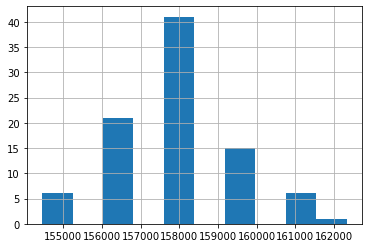

In [15]:
flights[flights.arrival_airport == 'SVO'].flight_costs.hist()

<AxesSubplot:>

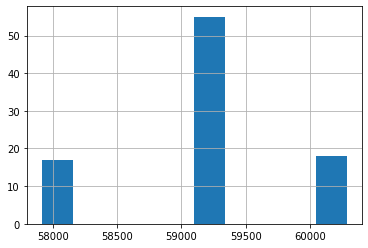

In [16]:
flights[flights.arrival_airport == 'EGO'].flight_costs.hist()

Посмотрев на графики распределения стоимости топлива на перелеты по одному и другому навправлению делаем выводы:

1. Рейсы в Москву дороже, это объясняется расстоянием и более длительным полетом.
2. Распределение более компактное, а соответственно лучше прогнозируемо в Белгород.

Нужно рассмотреть процент затрат по каждому рейсу.

In [17]:
flights['costs_percentage'] = round((flights.flight_costs / flights.sum_amount)*100,2)

Всего полётов в Москву: 90
Полёты в Москву, затраты на которые > 10%: 35


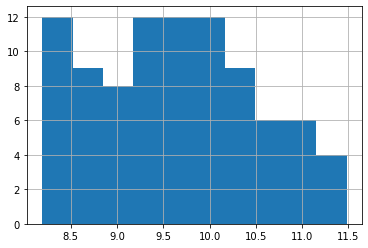

In [18]:
flights[flights.arrival_airport == 'SVO'].costs_percentage.hist()
print('Всего полётов в Москву:',flights[(flights.arrival_airport == 'SVO')].flight_id.count())
print('Полёты в Москву, затраты на которые > 10%:',flights[(flights.arrival_airport == 'SVO') 
                                       & (flights.costs_percentage >= 10)].flight_id.count())

Всего полётов в Белгород: 90
Полёты в Белгород, затраты на которые > 10%: 3


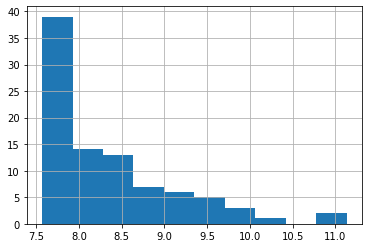

In [19]:
flights[flights.arrival_airport == 'EGO'].costs_percentage.hist()
print('Всего полётов в Белгород:',flights[(flights.arrival_airport == 'EGO')].flight_id.count())
print('Полёты в Белгород, затраты на которые > 10%:',flights[(flights.arrival_airport == 'EGO') 
                                       & (flights.costs_percentage >= 10)].flight_id.count())

Видим, что затраты на полёты в Москву намного чаще выходят за границу 10% (35 полётов из 90)  
В то время, как в Белгород таких полётов всего 3.
В виду того, что затраты на полёты примерно одинаковые (разница между максимальной и минимальной стоимостью примерно 6%, например по полётам в Москву), то как вывод можем предположить, что на "выгодность" полёта влияет заполненность самолетов.

Посмотрим в какие дни недели какая заполняемость самолетов. Смотрим суммарно, чтоб понять за весь период. 

In [20]:
print('Средняя заполняемость самолётов в Москву по дням недели:\n',
      pd.DataFrame(flights[flights.arrival_airport == 'SVO'].groupby(flights.day_of_week).seats_count_sold.sum()))

Средняя заполняемость самолётов в Москву по дням недели:
              seats_count_sold
day_of_week                  
0.0                      1379
1.0                      1492
2.0                      1504
3.0                      1341
4.0                      1509
5.0                      1544
6.0                      1441


In [21]:
print('Средняя заполняемость самолётов в Белгород по дням недели:\n',
      pd.DataFrame(flights[flights.arrival_airport == 'EGO'].groupby(flights.day_of_week).seats_count_sold.sum()))

Средняя заполняемость самолётов в Белгород по дням недели:
              seats_count_sold
day_of_week                  
0.0                      1159
1.0                      1155
2.0                      1172
3.0                      1144
4.0                      1179
5.0                      1165
6.0                      1167


Как и в прежних наблюдениях, видим, что рейс в Белгород более "ровный", прогнозируемый и стабильный.
В то время, как в Москву выбиваются 2 дня - воскресенье и среда.

Как итоговое предложение: Полёты из Анапы в Москву в воскресенье и в среду можно отменить, чем повысить заполняемость полётов в другие дни недеи на это направление, в то время как эти самолёты можно задействовать на полёты на другие направления.

Что еще можно рассмотреть?
1. Дополнительные затраты на обслуживание рейса (экипаж, обслуживание самолета, стоимость "фрахта" в эропорту, затраты на обслуживание пассажиров - еда, напитки, другое)
2. Сравнить с другими сезонами, чтобы понять, какой сезон считать высоким/низким
3. Повысить выгодность полёта, т.е. уменьшения процента затрат можно достигнуть за счет увеличения стоимости билетов бизнес-класса. Дополнительные наблюдения говорят о том, что 11% мест бизнес-класса генерируют 25% от суммы общей выручки от билетов, в то время как в эконом-классе такая пропорция: 89% мест дают соответственно 75% от выручки. Как предпоположение -  увеличение стоимости бизннес-класса не так чувствительно для тех, кто покупает такой класс билетов, в отличие от клиентов эконом-класса.

In [25]:
a = flights[flights.aircraft_occupancy <= 75].flight_id.to_list()
a

[136122, 136253, 136352, 136360, 136418, 136642, 136807]

In [29]:
flights[flights.flight_id.isin(a)]

,flight_id,arrival_airport,model,seats_total,flight_time,day_of_week,sum_amount,seats_count_sold,aircraft_occupancy,flight_costs,costs_percentage
2,136122,SVO,Boeing 737-300,130,100.0,0.0,1431000.0,97,74.62,157600,11.01
30,136253,SVO,Boeing 737-300,130,98.0,6.0,1407800.0,93,71.54,154448,10.97
56,136352,SVO,Boeing 737-300,130,100.0,6.0,1372400.0,92,70.77,157600,11.48
57,136360,SVO,Boeing 737-300,130,100.0,0.0,1455400.0,97,74.62,157600,10.83
69,136418,SVO,Boeing 737-300,130,100.0,3.0,1407800.0,97,74.62,157600,11.19
102,136642,EGO,Sukhoi Superjet-100,97,49.0,1.0,531000.0,64,65.98,57918,10.91
144,136807,EGO,Sukhoi Superjet-100,97,50.0,4.0,531000.0,68,70.10,59100,11.13
